![asd](https://datasets.activeloop.ai/wp-content/uploads/2019/12/MNIST-handwritten-digits-dataset-visualized-by-Activeloop.webp)

# **MNIST Dataset**

> Dataset MNIST adalah salah satu dataset paling terkenal dalam bidang pengenalan gambar dan machine learning. Dataset ini terdiri dari kumpulan gambar angka tulisan tangan yang ditulis oleh orang-orang dari American National Institute of Standards and Technology (NIST). Dataset ini terdiri dari:

> 60,000 gambar untuk pelatihan (dari 0 sampai 59,999)
> 10,000 gambar untuk pengujian (dari 60,000 sampai 69,999)
> Setiap gambar dalam dataset ini berukuran 28x28 piksel, berwarna abu-abu (grayscale), dan menampilkan satu digit tunggal dari 0 sampai 9. Tujuan utama dari dataset ini adalah untuk melatih sistem machine learning untuk mengenali dan mengklasifikasikan angka yang ditulis tangan.

> MNIST telah menjadi benchmark umum untuk menguji kinerja algoritma dan model dalam pengenalan gambar dan klasifikasi. Banyak tutorial dan contoh dalam literatur machine learning menggunakan MNIST sebagai contoh awal untuk membangun dan menguji model.

Kira kira begitulah tentang dataset MNIST yang akan kita gunakan sekarang

Apa yang akan kita lakukan ? kita akan melakukan **image classification**

Sebelumnya apa itu Image Classification ?

> Image classification adalah proses mengklasifikasikan atau mengidentifikasi label atau kategori yang tepat untuk sebuah gambar berdasarkan konten visualnya. Tujuan dari image classification adalah untuk mengembangkan model machine learning yang dapat mengenali dan membedakan objek atau pola visual dalam gambar

## **Mari kita mulai Coding !!!**

### Langkah pertama 
seperti biasa kita akan menggunakan pytorch

pada kesempatan kali ini juga saya akan mengenalkan kepada kalian semua apa itu pytorch ignite (akan dijelaskan lebih lanjut di bawah)

sekarang kita import dulu pytorch dan beberapa hal yang perlu kita import juga dari torchvision

In [1]:
# Core Pytorch
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader

# Core TorchVision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Hal baru yang akan kita coba Yaitu Ignite
from ignite.engine import Engine,Events,create_supervised_trainer,create_supervised_evaluator
from ignite.metrics import Accuracy,Loss
from ignite.contrib.handlers import ProgressBar

Setelah import selesai, kita akan mendownload dataset nya terlebih dahulu

Kita akan menggunakan Dataset MNIST seperti yang sudah dijelaskan diatas

In [2]:
train_data = datasets.MNIST(
    root="data",
    download=True,
    train=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    download=True,
    train=False,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17556168.75it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 466480.64it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4386252.09it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2810226.99it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Download dataset sudah selesai dan sudah dimasukan kedalam variable Train dan Test

Apa Selanjutnya ? **Explorasi Data**

### Waktunya Explorasi Data

kita akan melakukan explorasi data dan memvisualisasikannya dengan matplotlib, ingat karna kita sedang berkutat dengan data gambar untuk saat ini hal yang paling masuk akal agar kita bisa memahami data dengan lebih mudah yaitu memvisualisasikannya agar bisa kita lihat dibandingkan dengan membaca angka angka

In [3]:
# Explorasi Train Data Pada Index ke 0
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Dari data diatas kita dapat melihat secara sekilas bahwa : 

train_data[0] -> berisi data train pada index ke 0
train data juga memiliki child 2 child 

train_data [0][0] -> berisi data gambar (kumpulan pixel)
train_data [0][1] -> berisi label gambar (dalam kasus ini adalah "5")

In [4]:
# Explorasi Data Gambar
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Sulit bukan jika kita harus membaca angka angka diatas ? maka dari itu setelah ini kita akan visualisasikan data diatas menjadi gambar agar kita dapat lebih mudah untuk memahami data apa yang sedang kita kerjakan

Tapi sebelum itu mari kita lihat label nya terlebih dahulu

In [5]:
train_data[0][1]

5

Label pertama berisi 5, Kita tahu bahwa data MNIST berisi data gambar 0-9 

Sepertinya gambar pertama yang sedang kita explore ini adalah gambar dengan angka 5

In [6]:
train_data[0][0].shape, train_data[0][1]

(torch.Size([1, 28, 28]), 5)

Tidak lupa juga kita periksa shape nya

Diatas tertera shape gambar nya adalah : (torch.Size([1, 28, 28]), 5)

1 color channel
28 x 28 pixel

Kenapa ini penting dilakukan untuk mengecheck shape ? karna kita harus tau data input yang akan dimasukan ke model nantinya

### Visualisasi Data

mari kita visualisasikan data yang telah kita lihat sebelumnya, dari pada kita harus melihat angka angka yang mungkin kalian pun bingung untuk membacanya lebih baik kita visualisasikan saja datanya

> Import matplotlib agar kita bisa visualisasikan data

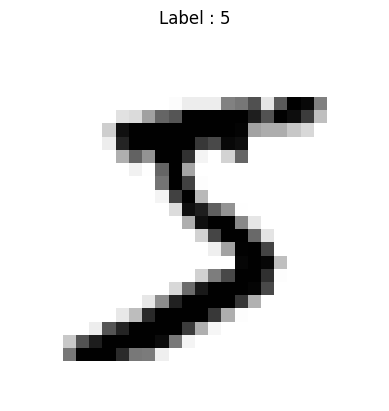

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_data[0][0].squeeze(),cmap=plt.cm.binary)
plt.title(f"Label : {train_data[0][1]}")
plt.axis(False)
plt.show()

Seperti yang sudah kita bicarakan, gambar pertama yaitu menunjukan angka 5 dengan label "5"

masing masing data sudah diberi label jadi kita tidak usah memberi label secara manual

Agar Lebih mudah dalam explorasi data dan visualisasi data, maka dari itu lebih baik kita buat angka random agar kita bisa melakukan visualisasi data acak

Apakah penting dilakukan ? Cukup penting mengingat data yang kita kerjakan berjumlah ribuan maka dari itu visualisasi data dengan number random akan membantu kita

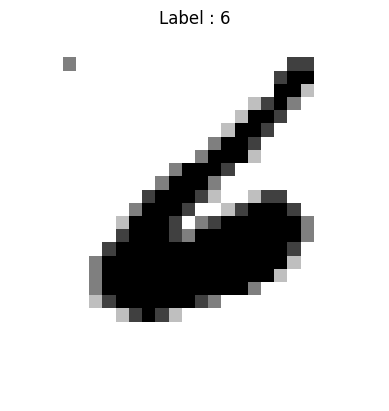

In [8]:
import random

random_number = random.randint(0,len(train_data))

def show_single_random_image(index):
    plt.figure()
    plt.imshow(train_data[index][0].squeeze(),cmap=plt.cm.binary)
    plt.title(f"Label : {train_data[index][1]}")
    plt.axis(False)
    plt.show()
    
# Tampilkan random index dan visualisasikan
show_single_random_image(random_number)

**Kalian bisa jalankan seterusnya untuk explorasi data lebih lanjut**

Saya akan menjelaskan sedikit tentang baris code diatas : 

Bertujuan untuk membuat angka random dari 0 s/d panjang dari train_data
> random_number = random.randint(0,len(train_data))

Membuat Figure Baru
> plt.figure()

Menampilkan gambar index 0, squeeze berfungsi untuk menghilangkan dimensi yang tidak diperlukan, cmap plt.cm.binary bermaksud agar gambar menjadi hitam putih
> plt.imshow(train_data[index][0].squeeze(),cmap=plt.cm.binary)

Menampilkan label sesuai dengan index gambar yang ditampilkan
> plt.title(f"Label : {train_data[index][1]}")

Kita hilangkan axis x dan axis y karna tidak diperlukan untuk visualisasi data
> plt.axis(False)

Terakhir menampilkan gambarnya
> plt.show()

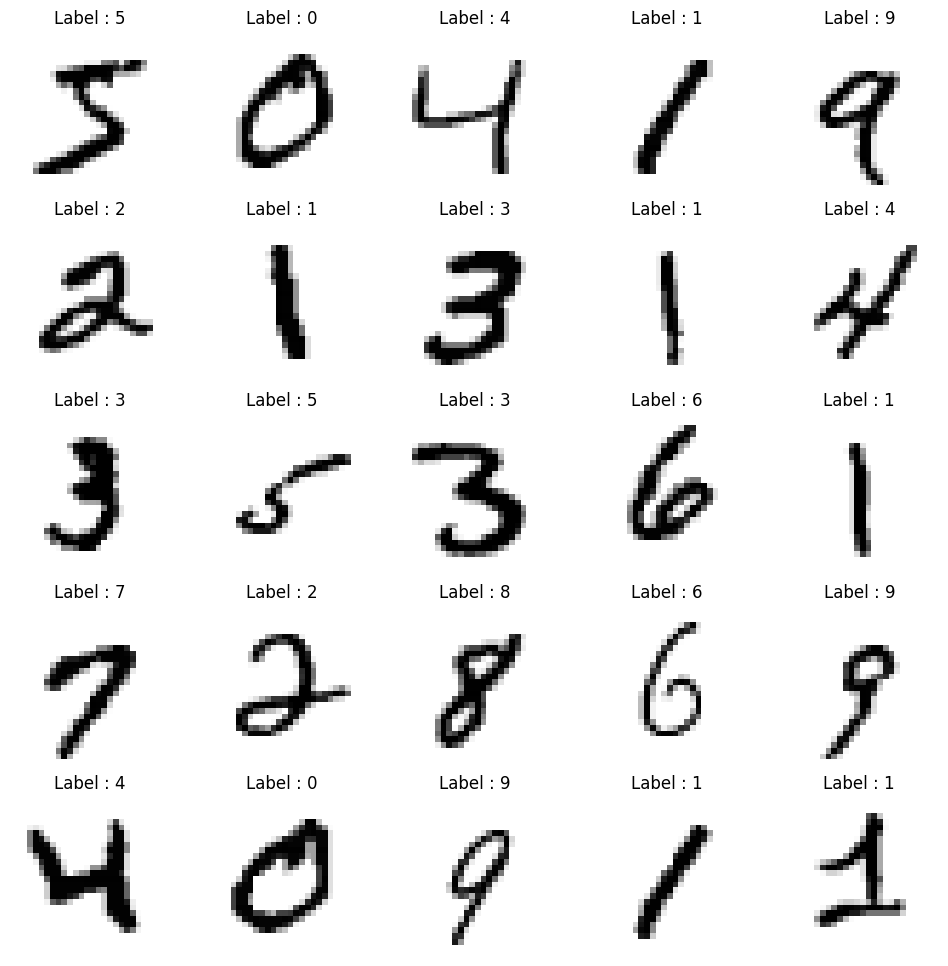

In [9]:
def show_grid_image():
    plt.figure(figsize=(12,12))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(train_data[i][0].squeeze(),cmap=plt.cm.binary)
        plt.title(f"Label : {train_data[i][1]}")
        plt.axis(False)
    plt.show()
    
show_grid_image()

Selanjutnya saya juga membuat tampilan grid gambar dari index ke 0 sampai 25

Kenapa saya membuat ini ? jawabannya simple agar memudahkan kita dalam visualisasi data dengan gambar yang cukup banyak sehingga kita bisa melihat lebih banyak gambar

Explorasi data ? Sudah

Visualisasi data ? Sudah

Apa selanjutnya ?

### Persiapan Data untuk Training

ingat pytorch mengharapkan format seperti ini untuk training data : 

[batch_size,input]

sedangkan untuk data yang kita punya sekarang 

[input]

maka dari itu kita akan menggunakan DataLoader untuk membuat batch, selain membagi bagi data ke batch

batch juga berfungsi untuk meringankan kinerja mesin pada saat Training

In [10]:
# Set Seed (angka nya bebas sesuka kalian) saya lebih suka angka 42
torch.manual_seed(42)

# membuat train loader
train_loader = DataLoader(
    train_data,
    batch_size=64,
    num_workers=2,
    shuffle=True
)

# membuat test loader
test_loader = DataLoader(
    test_data,
    batch_size=64,
    num_workers=2,
    shuffle=False
)

# melihat train dan test loader
train_loader,test_loader

(<torch.utils.data.dataloader.DataLoader at 0x78a21bbff940>,
 <torch.utils.data.dataloader.DataLoader at 0x78a21bc42e00>)

DataLoader sudah siap, bisa kalian lihat bahwa train_data dan test_data sudah berubah menjadi format DataLoader

dari yang awalnya seperti ini :

> [1,28,28]

sekarang menjadi seperti ini

> [1,1,28,28]

Selanjutnya kita akan menyiapkan device agar pada saat training menggunakan GPU (cuda) atau jika mesin tidak memiliki GPU tersedia kita bisa menggunakan CPU

tapi kalau untuk penggunaan CPU training kita memakan waktu yang lebih lama maka dari itu kalian jangan lupa untuk nyalakan GPU terlebih dahulu

kalian bisa nyalakan GPU di 

- more settings (pojok kanan atas) (titik titik tiga)
- accelerator
- gunakan t4 x 2 / p100

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device yang digunakan : {device}")

Device yang digunakan : cuda


GPU sudah ready, kita bisa menggunakan CUDA untuk mempercepat proses training

Langkah selanjutnya kita akan membuat Model sederhana saja, model ini akan saya deskripsikan sebagai berikut : 

1. Layer pertama dengan input 28 x 28 (mengacu pada shape yang sudah kita lihat) dengan output 512 fully connected layer
2. Layer kedua dengan input 512 (ambil dari output layer pertama) menjadi 512 fully connected layer lagi
3. Layer ketiga dengan input 512 (ambil dari output layer kedua) menjadi 10 (karna dataset mnist terdiri dari angka 0-9 yang berjumlah 10 class) 

### Pembuatan Model

In [12]:
class SimpleNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.ln1 = nn.Linear(28*28,512)
        self.ln2 = nn.Linear(512,512)
        self.ln3 = nn.Linear(512,10)
    def forward(self,x):
        x = x.view(x.size(0),-1)
        x = F.relu(self.ln1(x))
        x = F.relu(self.ln2(x))
        x = self.ln3(x)
        return x

model = SimpleNetwork().to(device)
print(model)

SimpleNetwork(
  (ln1): Linear(in_features=784, out_features=512, bias=True)
  (ln2): Linear(in_features=512, out_features=512, bias=True)
  (ln3): Linear(in_features=512, out_features=10, bias=True)
)


**Yippie**

Model sudah terbentuk, tapi sebelum masuk ke penentuan loss function dan penentuan optimizer

Kita akan melakukan pengetest-an terlebih dahulu apakah format model yang kita punya sudah sesuai atau belum

In [13]:
# Test model
dummy_input = torch.rand(1,1,28,28).to(device)
output = model(dummy_input)
print(output)

tensor([[-0.0487, -0.0243,  0.0518,  0.0293, -0.0612, -0.0866,  0.0371,  0.0536,
         -0.0254,  0.0334]], device='cuda:0', grad_fn=<AddmmBackward0>)


Dari hasil test yang telah kita lakukan diatas, format sudah sesuai

Kalian bisa lakukan test jika format tidak sesuai (train_data) -> sebelum menjadi train_loader

Kalian bisa jadikan dummy_input menjadi (1,28,28) dan bisa kalian lihat error nya seperti apa

Tapi saya akan lanjutkan ke dalam Training Model

In [14]:
from torch.optim import Adam

# Penentuan Optimizer
optimizer = Adam(model.parameters(),lr=1e-3)

# Penentuan Loss Function
criterion = nn.CrossEntropyLoss() # Criterion = Loss Function

criterion adalah nama variable yang umum digunakan untuk loss function

**Optimizer ? Ready**
**Loss Function ? Ready**

Waktunya melakukan proses training

### Training Model

kita akan melakukan training secara singkat saja:

- 5 epochs
- print per 100 batch
- lakukan evaluasi pada saat epoch telah selesai

In [15]:
max_epochs = 5

# Training Loop
for epoch in range(max_epochs):
    model.train()
    for batch,(image,label) in enumerate(train_loader):
        optimizer.zero_grad()
        image,label = image.to(device),label.to(device)
        pred = model(image)
        loss = criterion(pred,label)
        
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            print(f"Epoch : {epoch + 1} Batch : {batch}/{len(train_loader)} Loss : {loss.item():.3f}")
    
    model.eval()
    correct = 0
    with torch.no_grad():
        for image,label in test_loader:
            image,label = image.to(device),label.to(device)
            pred = model(image)
            correct += (pred.argmax(1) == label).type(torch.float).sum().item()
    correct /= len(test_loader.dataset)
    print(f"Akurasi : {100 * correct:.2f}%")

Epoch : 1 Batch : 0/938 Loss : 2.301
Epoch : 1 Batch : 100/938 Loss : 0.272
Epoch : 1 Batch : 200/938 Loss : 0.250
Epoch : 1 Batch : 300/938 Loss : 0.183
Epoch : 1 Batch : 400/938 Loss : 0.156
Epoch : 1 Batch : 500/938 Loss : 0.145
Epoch : 1 Batch : 600/938 Loss : 0.056
Epoch : 1 Batch : 700/938 Loss : 0.078
Epoch : 1 Batch : 800/938 Loss : 0.079
Epoch : 1 Batch : 900/938 Loss : 0.083
Akurasi : 96.35%
Epoch : 2 Batch : 0/938 Loss : 0.060
Epoch : 2 Batch : 100/938 Loss : 0.056
Epoch : 2 Batch : 200/938 Loss : 0.086
Epoch : 2 Batch : 300/938 Loss : 0.207
Epoch : 2 Batch : 400/938 Loss : 0.056
Epoch : 2 Batch : 500/938 Loss : 0.077
Epoch : 2 Batch : 600/938 Loss : 0.102
Epoch : 2 Batch : 700/938 Loss : 0.060
Epoch : 2 Batch : 800/938 Loss : 0.140
Epoch : 2 Batch : 900/938 Loss : 0.090
Akurasi : 96.81%
Epoch : 3 Batch : 0/938 Loss : 0.081
Epoch : 3 Batch : 100/938 Loss : 0.043
Epoch : 3 Batch : 200/938 Loss : 0.030
Epoch : 3 Batch : 300/938 Loss : 0.067
Epoch : 3 Batch : 400/938 Loss : 0.1

**Hasil yang sangat sangat bagus**

Akurasi yang kita hasilkan mencapai diatas 90% mari kita lakukan prediksi dengan model yang sudah kita training dan visualisasikan juga hasilnya

In [16]:
torch.cuda.empty_cache()

Jangan lupa, setelah training kita hapus dulu cache yang ada agar GPU bisa terpakai lagi nanti jika proses training dibutuhkan kembali

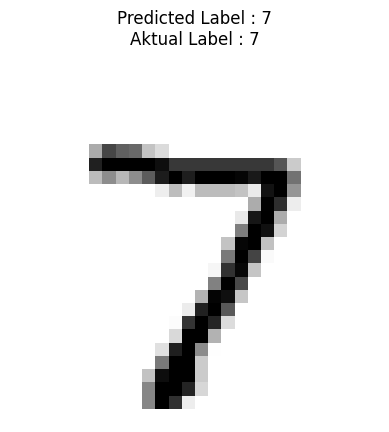

In [17]:
image,label = test_data[0][0],test_data[0][1]
with torch.no_grad():
    image = image.to(device)
    pred = model(image)
    predicted_label = pred[0].argmax(0)
    
    plt.figure()
    plt.imshow(image.cpu().squeeze(),cmap=plt.cm.binary)
    plt.title(f"Predicted Label : {predicted_label}\nAktual Label : {label}")
    plt.axis(False)
    plt.show()

Tidak diragukan lagi, dengan model yang telah kita buat dengan akurasi diatas 90% kita bisa bilang bahwa model yang telah kita buat ini sudah cukup baik untuk mengenali pola gambar pada data test

kita bisa lihat diatas bahwa prediksi yang dilakukan model kita benar

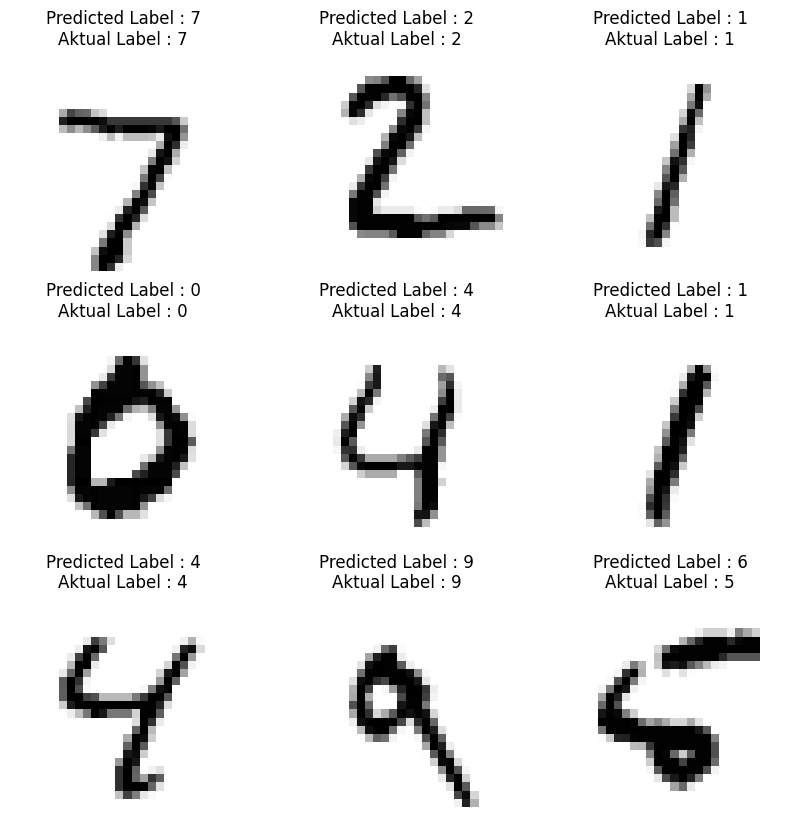

In [18]:
def show_grid_prediction():
    plt.figure(figsize=(10,10))
    for i in range(9):
        image,label = test_data[i][0],test_data[i][1]
        with torch.no_grad():
            image = image.to(device)
            pred = model(image)
            predicted_label = pred[0].argmax(0)

            plt.subplot(3,3,i+1)
            plt.imshow(image.cpu().squeeze(),cmap=plt.cm.binary)
            plt.title(f"Predicted Label : {predicted_label}\nAktual Label : {label}")
            plt.axis(False)
    plt.show()

show_grid_prediction()

Saya juga menambahkan prediksi dengan loop agar kita lihat visualisasi prediksi secara lebih jelas

### Perkenalan Pytorch Ignite
![Ignite](https://avatars.githubusercontent.com/u/77448345?s=200&v=4)

**Apasih itu Pytorch Ignite ?**

PyTorch Ignite adalah library tingkat tinggi yang dibangun di atas PyTorch untuk mempermudah proses pelatihan dan evaluasi model machine learning dan deep learning. Ignite dirancang untuk membuat pekerjaan lebih mudah dan lebih terstruktur ketika bekerja dengan PyTorch, terutama ketika menangani pelatihan, validasi, logging, dan evaluasi model.

Fitur Utama PyTorch Ignite
1. Abstraksi yang Mudah: Ignite menyediakan abstraksi tingkat tinggi untuk mengelola siklus hidup pelatihan model, termasuk loop pelatihan dan validasi.
2. Handlers dan Events: Ignite memiliki sistem event-handling yang kuat yang memungkinkan pengguna untuk menyisipkan logika kustom pada berbagai titik dalam proses pelatihan. Anda dapat mendefinisikan event handlers yang akan dieksekusi pada event tertentu seperti awal atau akhir epoch.
3. Metrix Evaluasi: Ignite menyediakan berbagai metrik evaluasi yang sudah diimplementasikan dan dioptimalkan untuk digunakan dengan mudah.
4. Integrasi Logging: Ignite terintegrasi dengan baik dengan berbagai library logging seperti TensorBoard, Visdom, dan MLflow, memudahkan pelacakan dan visualisasi metrik selama pelatihan.
5. Checkpoints: Ignite mempermudah proses penyimpanan dan pemulihan state dari model, optimizer, dan metrik menggunakan checkpoints.

### Kenapa kita harus gunakan Ignite ?

alasannya sederhana, dengan fleksibilitas yang tinggi kita tidak perlu lagi harus membuat training loop secara manual

dengan ignite pula, kita bisa memangkas waktu untuk membuat fungsi training loop itu sendiri

dan yang tidak kalah penting adalah

**Code menjadi RAPI**

Mari kita lakukan implementasi dengan ignite

In [19]:
# Bebaskan CUDA Memori
torch.cuda.empty_cache()

# Membuat trainer
trainer = create_supervised_trainer(model,optimizer,criterion,device)
ProgressBar().attach(trainer)

# Membuat metriks
val_metrics = {
    "Accuracy" : Accuracy(),
    "Loss" : Loss(criterion)
}

# Inisialisasi evaluator
train_evaluator = create_supervised_evaluator(model,metrics=val_metrics,device=device)
test_evaluator = create_supervised_evaluator(model,metrics=val_metrics,device=device)

# Event saat training
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    train_evaluator.run(train_loader)
    metrics = train_evaluator.state.metrics
    print(f"Epoch : {trainer.state.epoch}\nTraining Akurasi: {metrics['Accuracy']:.2f} Training loss: {metrics['Loss']:.2f}")


@trainer.on(Events.EPOCH_COMPLETED)
def log_validation_results(trainer):
    test_evaluator.run(test_loader)
    metrics = test_evaluator.state.metrics
    print(f"Epoch : {trainer.state.epoch}\nTraining Akurasi: {metrics['Accuracy']:.2f} Training loss: {metrics['Loss']:.2f}")
    
# Menjalankan training
trainer.run(train_loader,max_epochs=5)

[1/938]   0%|           [00:00<?]

Epoch : 1
Training Akurasi: 0.99 Training loss: 0.02
Epoch : 1
Training Akurasi: 0.98 Training loss: 0.08


[1/938]   0%|           [00:00<?]

Epoch : 2
Training Akurasi: 0.99 Training loss: 0.02
Epoch : 2
Training Akurasi: 0.98 Training loss: 0.08


[1/938]   0%|           [00:00<?]

Epoch : 3
Training Akurasi: 0.99 Training loss: 0.02
Epoch : 3
Training Akurasi: 0.98 Training loss: 0.08


[1/938]   0%|           [00:00<?]

Epoch : 4
Training Akurasi: 1.00 Training loss: 0.01
Epoch : 4
Training Akurasi: 0.98 Training loss: 0.07


[1/938]   0%|           [00:00<?]

Epoch : 5
Training Akurasi: 1.00 Training loss: 0.01
Epoch : 5
Training Akurasi: 0.98 Training loss: 0.09


State:
	iteration: 4690
	epoch: 5
	epoch_length: 938
	max_epochs: 5
	output: 0.00011297244054730982
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

Bisa dilihat diatas, training yang kita lakukan lebih mudah dibaca dan lebih rapi bukan ?

### Analisis Code Dengan Pytorch Ignite

**1. Membersihkan Memori CUDA**

Tujuan: Membersihkan memori di kartu grafis (GPU) agar tidak penuh.

Gambaran: Bayangkan membersihkan mainan di kamar agar ada ruang untuk bermain lagi.

In [20]:
# Bebaskan CUDA Memori
torch.cuda.empty_cache()

**2. Membuat Pelatih (Trainer)**

Tujuan: Membuat pelatih yang akan mengajarkan model kita.

Gambaran: Seperti membuat pelatih olahraga yang membantu kita berlatih dengan baik.

ProgressBar: Menambahkan bar kemajuan agar kita bisa melihat sejauh mana pelatihan sudah berjalan.

In [21]:
# Membuat trainer
trainer = create_supervised_trainer(model,optimizer,criterion,device)
ProgressBar().attach(trainer)

**3. Membuat Metrik**

Tujuan: Membuat alat ukur untuk melihat seberapa baik model kita bekerja.

Gambaran: Seperti punya penggaris dan timbangan untuk mengukur tinggi dan berat badan kita.

In [22]:
# Membuat metriks
val_metrics = {
    "Accuracy" : Accuracy(),
    "Loss" : Loss(criterion)
}

**4. Inisialisasi Evaluator**

Tujuan: Membuat evaluator yang akan mengukur seberapa baik model kita setelah pelatihan.

Gambaran: Seperti punya guru yang akan menguji kita setelah belajar.

In [23]:
# Inisialisasi evaluator
train_evaluator = create_supervised_evaluator(model,metrics=val_metrics,device=device)
test_evaluator = create_supervised_evaluator(model,metrics=val_metrics,device=device)

**5. Event Saat Pelatihan Selesai**

Tujuan: Mencatat hasil pelatihan dan validasi setiap selesai satu siklus pelatihan (epoch).

Gambaran: Seperti mencatat hasil ulangan kita setiap kali selesai belajar satu bab.

In [24]:
# Event saat training
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    train_evaluator.run(train_loader)
    metrics = train_evaluator.state.metrics
    print(f"Epoch : {trainer.state.epoch}\nTraining Akurasi: {metrics['Accuracy']:.2f} Training loss: {metrics['Loss']:.2f}")


@trainer.on(Events.EPOCH_COMPLETED)
def log_validation_results(trainer):
    test_evaluator.run(test_loader)
    metrics = test_evaluator.state.metrics
    print(f"Epoch : {trainer.state.epoch}\nTraining Akurasi: {metrics['Accuracy']:.2f} Training loss: {metrics['Loss']:.2f}")

**6. Menjalankan Pelatihan**

Tujuan: Memulai pelatihan model kita selama 5 kali putaran (epoch).

Gambaran: Seperti menjalankan latihan selama 5 hari berturut-turut untuk meningkatkan kemampuan kita.

In [25]:
# Menjalankan training
trainer.run(train_loader,max_epochs=5)

[1/938]   0%|           [00:00<?]

Epoch : 1
Training Akurasi: 0.99 Training loss: 0.02
Epoch : 1
Training Akurasi: 0.98 Training loss: 0.10


[1/938]   0%|           [00:00<?]

Epoch : 2
Training Akurasi: 1.00 Training loss: 0.01
Epoch : 2
Training Akurasi: 0.98 Training loss: 0.10


[1/938]   0%|           [00:00<?]

Epoch : 3
Training Akurasi: 1.00 Training loss: 0.01
Epoch : 3
Training Akurasi: 0.98 Training loss: 0.10


[1/938]   0%|           [00:00<?]

Epoch : 4
Training Akurasi: 1.00 Training loss: 0.01
Epoch : 4
Training Akurasi: 0.98 Training loss: 0.10


[1/938]   0%|           [00:00<?]

Epoch : 5
Training Akurasi: 1.00 Training loss: 0.01
Epoch : 5
Training Akurasi: 0.98 Training loss: 0.12


State:
	iteration: 4690
	epoch: 5
	epoch_length: 938
	max_epochs: 5
	output: 0.000560758460778743
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

### Ringkasan Tentang Pytorch Ignite Yang Telah Kita Buat

1. Membersihkan Memori CUDA: Membersihkan ruang di GPU.

2. Membuat Pelatih: Membuat pelatih yang membantu model belajar.

3. Membuat Metrik: Membuat alat ukur akurasi dan kerugian (loss).

4. Inisialisasi Evaluator: Membuat evaluator untuk mengukur hasil belajar.

5. Event Saat Pelatihan Selesai: Mencatat hasil setelah setiap epoch.

6. Menjalankan Pelatihan: Memulai pelatihan selama 5 epoch

Training akan berjalan seperti semua

Namun kita melihat hal yang keren, karna dengan menambahkan progress bar kita bisa tau training yang sedang kita lakukan

### Melakukan Prediksi 

Prediksi dapat dilakukan sama, untungnya karna kita telah membuat fungsi diatas kita tinggal memanggilnya kembali dengan model baru yang telah di training ulang

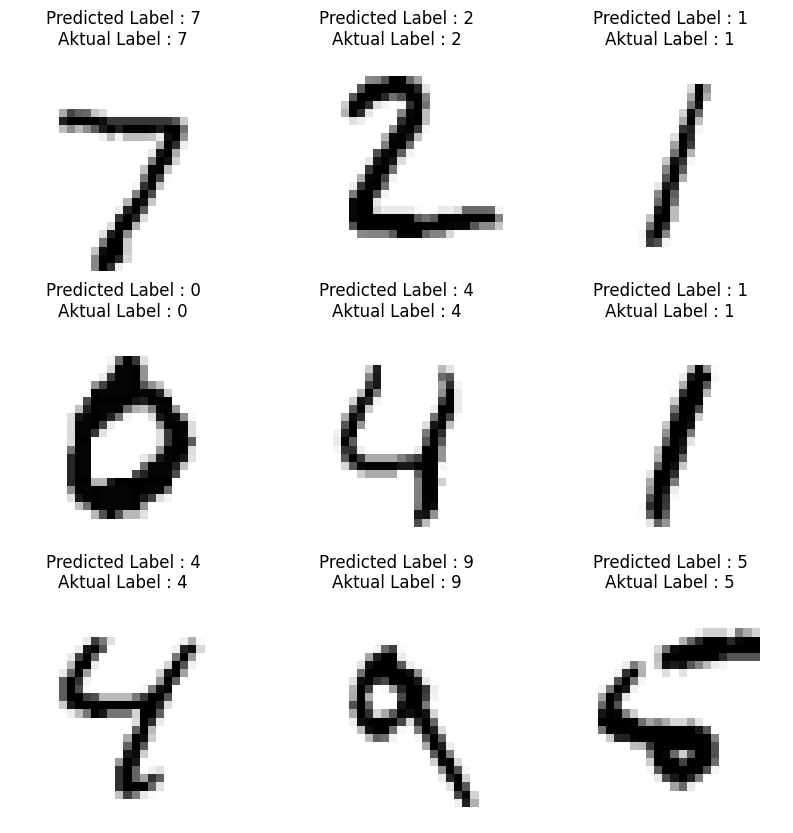

In [26]:
show_grid_prediction()

## Kesimpulan

Menggunakan PyTorch Ignite untuk pelatihan pada dataset MNIST membuat proses pelatihan lebih terstruktur dan mudah dimonitor. Ignite membantu dalam menangani proses pelatihan, pengukuran metrik, dan penanganan event dengan lebih efisien, sehingga memungkinkan kita untuk fokus pada pengembangan model dan analisis hasil pelatihan.